In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score


def get_evaluation_results(confusion_matrix):

    #                   predicted
    #              non-churn    churn
    #  Actual
    # non-churn      TN           FP    
    # churn          FN           TP

    result = []
    TN  = confusion_matrix[0][0]
    FP  = confusion_matrix[0][1]
    FN  = confusion_matrix[1][0]
    TP  = confusion_matrix[1][1]

    accuracy                    = (TN + TP)/float(TN + FP + FN + TP) # correctly-predicted/all-predictions
    sensitivity                 = TP/float(FN + TP)                  # correctly-predicted-positives/all-actual-positives
    TPR                         = TP/float(FN + TP)                  # correctly-predicted-positives/all-actual-positives
    recall                      = TP/float(FN + TP)                  # correctly-predicted-positives/all-actual-positives
    specificity                 = TN/float(TN + FP)                  # correctly-predicted-negatives/all-actual-negatives
    FPR                         = FP/float(TN + FP)                  # incorrectly-predicted-positives/all-actual-negatives
    precision                   = TP/float(TP+FP)                    # correctly-predicted-positives/all-predicted-positives  
    negative_predictive_value   = TN/float(TN+FN)                    # correctly-predicted-negatives/all-predicted-negatives
    F1_score                    = 2 * ((precision * recall)/float(precision + recall)) # harmonic mean of precision and recall

    result.append({'metric': 'accuracy', 'value': round(accuracy, 2)})
    result.append({'metric': 'sensitivity', 'value': round(sensitivity, 2)})
    result.append({'metric': 'TPR', 'value': round(TPR, 2)})
    result.append({'metric': 'recall', 'value': round(recall, 2)})
    result.append({'metric': 'specificity', 'value': round(specificity, 2)})
    result.append({'metric': 'FPR', 'value': round(FPR, 2)})
    result.append({'metric': 'precision', 'value': round(precision, 2)})
    result.append({'metric': 'negative_predictive_value', 'value': round(negative_predictive_value, 2)})
    result.append({'metric': 'F1_score', 'value': round(F1_score, 2)})

    return result

def draw_metrics(metrics, key_name, value_name):
    df = pd.DataFrame(metrics)
    ax = sns.barplot(data=df, x=key_name, y=value_name)
    plt.title('logistic regression model evaluation metrics')
    plt.xlabel('metric')
    plt.xticks(rotation=90)
    plt.ylabel('value')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',  # Format to two decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha='center', va='baseline', fontsize=12, color='black', rotation=90)

    plt.show()

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [27]:
# cutoff 0.4
confusion_matrix = [[500, 20],
                    [40, 440]]
mem = get_evaluation_results(confusion_matrix)
mem

[{'metric': 'accuracy', 'value': 0.75},
 {'metric': 'sensitivity', 'value': 0.75},
 {'metric': 'TPR', 'value': 0.75},
 {'metric': 'recall', 'value': 0.75},
 {'metric': 'specificity', 'value': 0.75},
 {'metric': 'FPR', 'value': 0.25},
 {'metric': 'precision', 'value': 0.72},
 {'metric': 'negative_predictive_value', 'value': 0.77},
 {'metric': 'F1_score', 'value': 0.74}]

In [25]:
result = []
for key, value in mem.items():
    obj = {}
    obj['metric'] = key
    obj['value'] = value
    result.append(obj)
result


[{'metric': 'accuracy', 'value': 0.75},
 {'metric': 'sensitivity', 'value': 0.75},
 {'metric': 'TPR', 'value': 0.75},
 {'metric': 'recall', 'value': 0.75},
 {'metric': 'specificity', 'value': 0.75},
 {'metric': 'FPR', 'value': 0.25},
 {'metric': 'precision', 'value': 0.72},
 {'metric': 'negative_predictive_value', 'value': 0.77},
 {'metric': 'F1_score', 'value': 0.74}]

In [7]:
# cutoff 0.5
confusion_matrix = [[1200, 400],
                    [210, 1190]]
get_evaluation_results(confusion_matrix)

{'accuracy': 0.8,
 'sensitivity': 0.85,
 'TPR': 0.85,
 'recall': 0.85,
 'specificity': 0.75,
 'FPR': 0.25,
 'precision': 0.75,
 'negative_predictive_value': 0.85,
 'F1_score': 0.8}

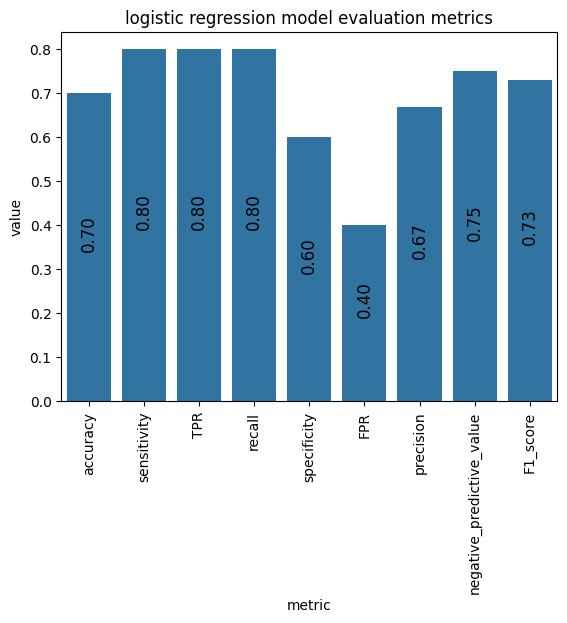

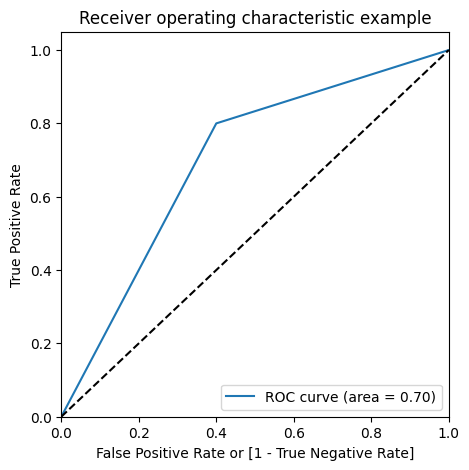

======0.45======


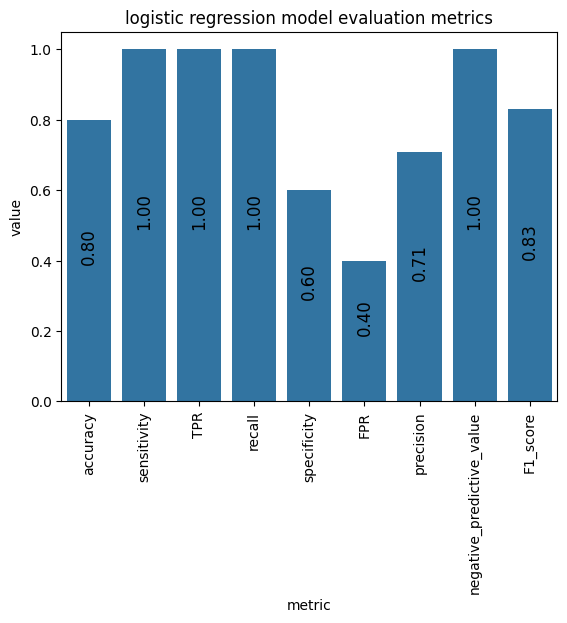

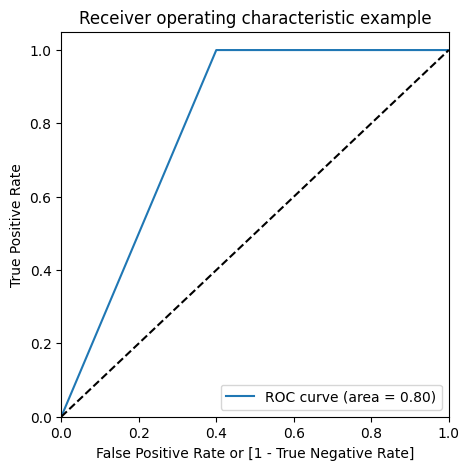

======0.50======


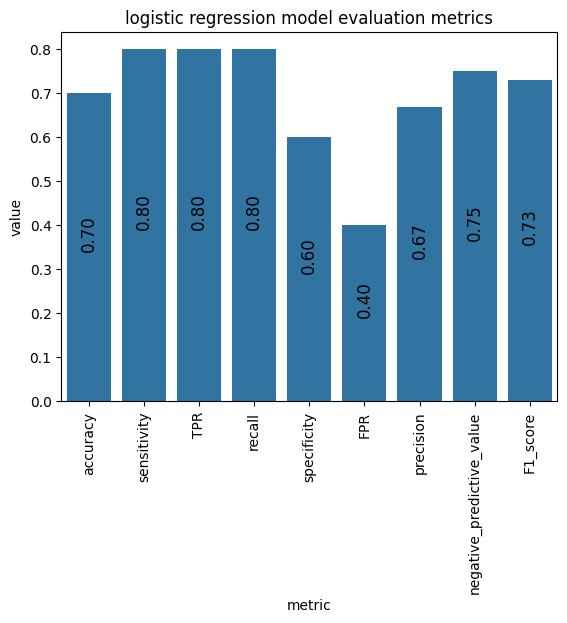

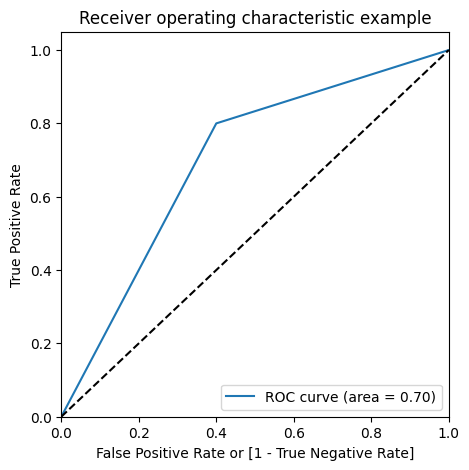

======0.55======


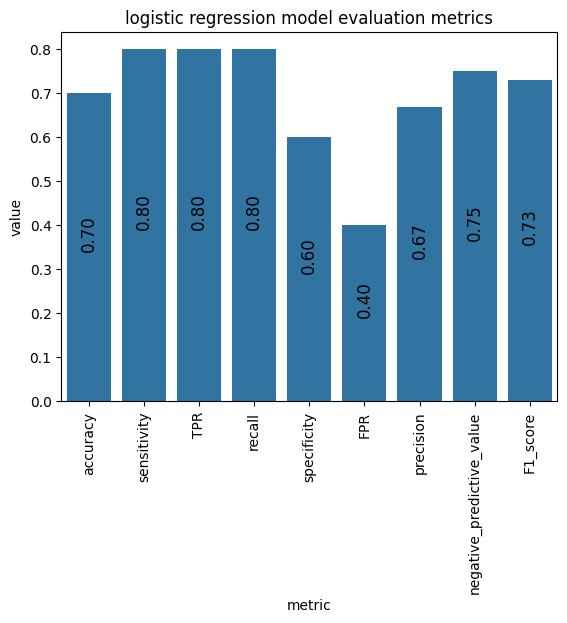

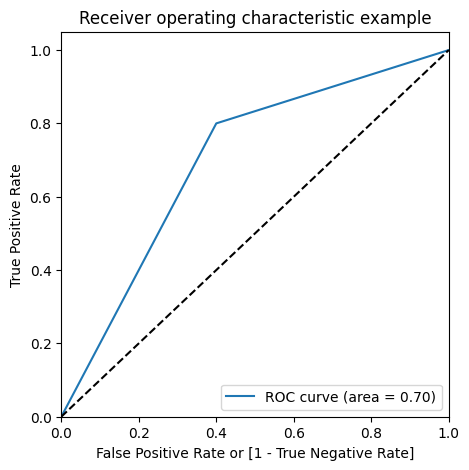

======0.60======


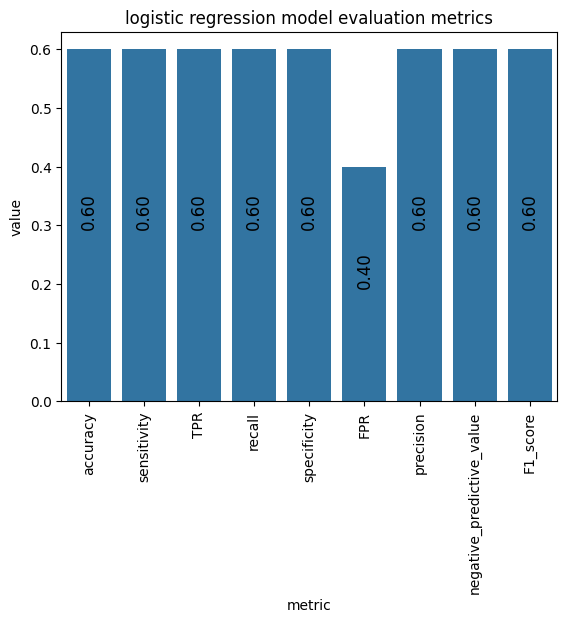

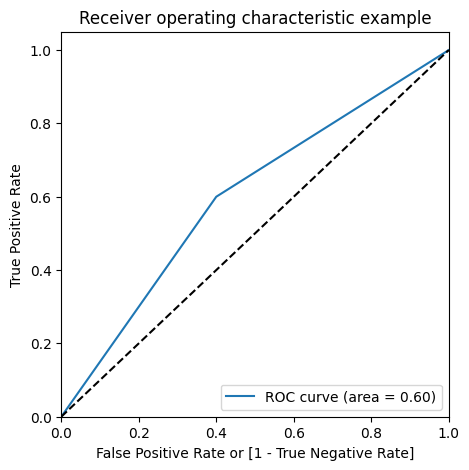

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

patient_id = [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]
heart_disease = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
predicted_probability_for_heart_disease = [0.34, 0.58, 0.79, 0.68, 0.21, 0.04, 0.48, 0.64, 0.61, 0.86]
predicted_label = [0, 1, 1, 1, 0, 0, 0, 1, 1, 1]

df = pd.DataFrame({'patient_id': patient_id,
                   'heart_disease': heart_disease,
                   'predicted_probability_for_heart_disease': predicted_probability_for_heart_disease,
                   'predicted_label': predicted_label})

df['0.45'] = df['predicted_probability_for_heart_disease'].map(lambda x: 1 if x > 0.45 else 0)
df['0.50'] = df['predicted_probability_for_heart_disease'].map(lambda x: 1 if x > 0.50 else 0)
df['0.55'] = df['predicted_probability_for_heart_disease'].map(lambda x: 1 if x > 0.55 else 0)
df['0.60'] = df['predicted_probability_for_heart_disease'].map(lambda x: 1 if x > 0.60 else 0)

cm = confusion_matrix(df['heart_disease'], df['predicted_label'])
mem = get_evaluation_results(cm)
draw_metrics(mem, 'metric', 'value')
draw_roc(df['heart_disease'], df['predicted_label'])

print('======0.45======')
cm = confusion_matrix(df['heart_disease'], df['0.45'])
mem = get_evaluation_results(cm)
draw_metrics(mem, 'metric', 'value')
draw_roc(df['heart_disease'], df['0.45'])
print('======0.50======')
cm = confusion_matrix(df['heart_disease'], df['0.50'])
mem = get_evaluation_results(cm)
draw_metrics(mem, 'metric', 'value')
draw_roc(df['heart_disease'], df['0.50'])
print('======0.55======')
cm = confusion_matrix(df['heart_disease'], df['0.55'])
mem = get_evaluation_results(cm)
draw_metrics(mem, 'metric', 'value')
draw_roc(df['heart_disease'], df['0.55'])
print('======0.60======')
cm = confusion_matrix(df['heart_disease'], df['0.60'])
mem = get_evaluation_results(cm)
draw_metrics(mem, 'metric', 'value')
draw_roc(df['heart_disease'], df['0.60'])